In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# fashion_mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

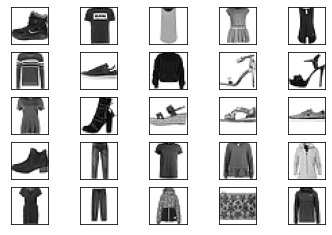

In [3]:
# 분류에 사용될 클래스 정의
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ancle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),    # 이미지를 1차원 데이터로 변형
    tf.keras.layers.Dense(128, activation='relu'),   # 입력층과 출력층을 연결. 활성화함수: relu
    tf.keras.layers.Dropout(0.2),                    # 과적합방지로 입력데이터 노드의 20%를 무작위로 0으로 만듬
    tf.keras.layers.Dense(10, activation='softmax')  # 출력층 노드 수가 10개. 활성화함수: softmax
    
])

model. compile(optimizer='adam',                     # 옵티마이저: 신경망의 파라미터(w,b)를 학습에 어떻게 반영할지 결정하는 방법
              loss='sparse_categorical_crossentropy',# 손실함수
              metrics=['accuracy'])                  # 모델평가방법

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5376 - accuracy: 0.8104
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4016 - accuracy: 0.8558
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3693 - accuracy: 0.8655
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3480 - accuracy: 0.8721
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3297 - accuracy: 0.8787
313/313 - 1s - loss: 0.3541 - accuracy: 0.8731


[0.3540799617767334, 0.8730999827384949]

### 이미지 데이터를 255로 나누는 이유

In [9]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [10]:
def print_image_summary(image, labels):
    print('-------------------------')
    print('Image Detales:')
    print('-------------------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
    
    for i, lab in enumerate(labels):
        min_val = np.min(image[:, :, i])
        max_val = np.max(image[:, :, i])
        print(f'{lab} : min={min_val:.4f}, max{max_val:.4f}')

(-0.5, 453.5, 702.5, -0.5)

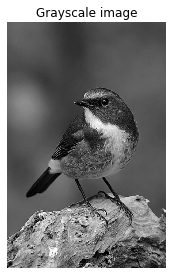

In [12]:
image_gs = imread('data/chap5/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(3,4))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off')

In [13]:
print_image_summary(image_gs, ['G'])

-------------------------
Image Detales:
-------------------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max1.0000


이미지 데이터는

### 다시 돌아와서 합성곱 네트워크로 모델을 생성해보자

In [13]:
# 데이터 전처리
X_train_final = x_train.reshape((-1, 28,28, 1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [16]:
# 합성곱 네트워크를 이용한 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 모델 훈련 및 성능 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.8790 - accuracy: 0.6725
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5979 - accuracy: 0.7805
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5421 - accuracy: 0.8025
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5029 - accuracy: 0.8178
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4753 - accuracy: 0.8279
313/313 - 2s - loss: 0.4906 - accuracy: 0.8234 - 2s/epoch - 5ms/step


[0.49060502648353577, 0.8234000205993652]

## 5.3 전이 학습(Transfer Learning)
 합성곱 신경망 기반의 딥러닝 모델을 제대로 훈련시키기 위해서는 많은 양의 데이터가 필요. 그러나, 충분히 큰 데이터셋을 얻는 것은 많으 돈과 시간을 요구한다.
이러한 어려움을 해결한 것이 전이 학습이다.
- 전이 학습은 이미지넷(ImageNet)처럼 아주 큰 데이터셋을 써서 훈련된 모델의 가중치를 가져와 우리가 해결하려는 과제에 맞게 보전하여 사용한다.
- 이러한 전이 학습을 위한 방법은 2가지가 있다.
    - 특성 추출 기법
    - 미세 조정 기법

### 5.3.1 특성 추출 기법
- ImageNet 데이터셋으로 사전 훈련된 모델을 가져온 후 마지막 완전연결층 부분만 새로 만든다.
- 학습할 때 마지막 완전연결층만 학습하고 나머지 계층은 학습되지 않게 한다.
- 사전 훈련된 네트워크의 합성곱층(가중치 고정)에 새로운 데이터를 통과시키고, 그 출력을 데이터 분류기에서 훈련시킨다.
- 사용 가능한 이미지 분류 모델
    - Xception
    - Inception V3
    - ResNet50
    - VGG16
    - VGG19
    - MobileNet
    


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# 사전 훈련된 모델 내려받기
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102973440/102967424 [==============================] - 3s 0us/step


- include_top : 네트워크 상단에 완전연결층을 포함할지 여부를 지정. 기본값 True
- weights : 가중치. None(무작위 초기화)과 'imagenet'(ImageNet에서 사전훈련된 값)을 지정할 수 있다.
- input_tensor : 입력 데이터의 텐서
- input_shape : 입력 이미지에 대한 텐서 크기
- pooling
    - None : 마지막 합성곱층이 출력
    - avg : 마지막 합성곱층에 글로벌 평균 풀링이 추가
    - max : 마지막 합성곱층에 글로벌 최대 풀링이 추가
- classes : weights로 'imagenet'을 사용하려면 classes 값이 1000이어야 한다. 다른 값으로 사용하고 싶으면 'None'으로 지정

In [19]:
# ResNet50 네트워크 구조 확인
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
# ResNet50 네트워크에 밀집층 추가
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [21]:
# 훈련에 사용될 환경 설정
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [27]:
# 모델 훈련
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = 'data/chap5/catanddog/train'
valid_dir = 'data/chap5/catanddog/validation'

train = ImageDataGenerator(
                            rescale = 1. / 255,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode='categorical')

valid = ImageDataGenerator(rescale=1.0/255)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",  
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical"
                                            )
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 17s - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4694
Epoch 2/10
13/13 - 15s - loss: 0.6931 - accuracy: 0.5195 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 16s - loss: 0.6932 - accuracy: 0.4779 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
13/13 - 15s - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 15s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 15s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 15s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 15s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 16s - loss: 0.6925 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 15s - lo

Text(0.5, 1.0, '오차')

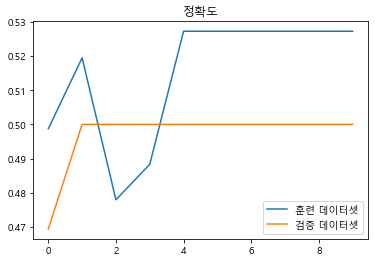

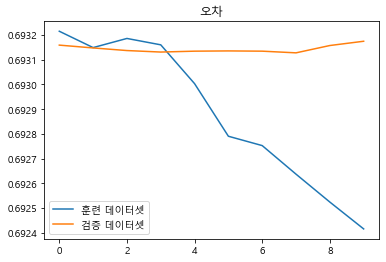

In [48]:
# 모델의 정확도 시각화
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = "C:/Windows/Fonts/malgun.ttf"    # 주피터 노트북에서 한글 깨지는 문제 해결
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]

val_loss = history.history["val_loss"]

epochs = range(len(accuracy))


plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

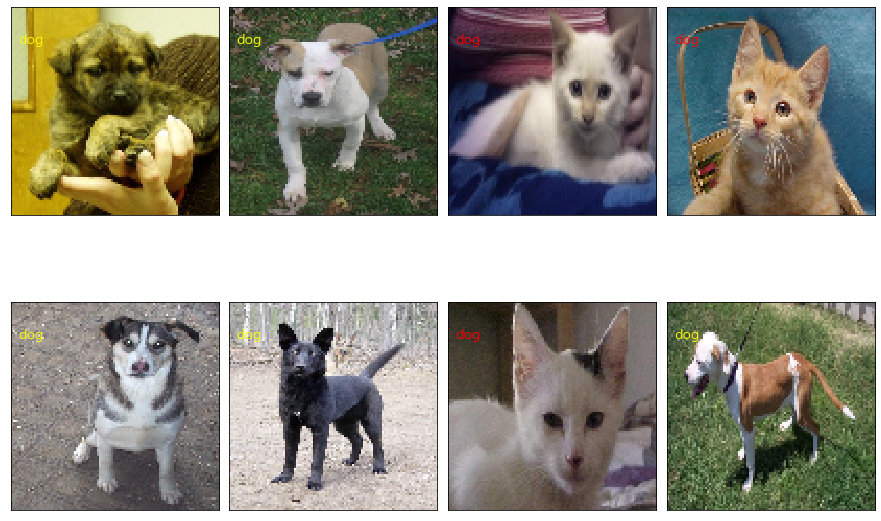

In [51]:
# 훈련된 모델의 예측
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

####